In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('inte.csv')

In [80]:
# Prepare the data
# Convert numbers to scientific notation
data['diff'] = data['diff'].apply(lambda x: '{:.2e}'.format(x))
data['diff'] = data['diff'].apply(lambda x: float(x.split('e')[1]))


# Convert numbers to scientific notation
data['r'] = data['r'].apply(lambda x: '{:.2e}'.format(x))
data['r'] = data['r'].apply(lambda x: float(x.split('e')[1]))

# Convert numbers to scientific notation
data['stan'] = data['stan'].apply(lambda x: '{:.2e}'.format(x))
data['stan'] = data['stan'].apply(lambda x: float(x.split('e')[1]))

# Create a new column with magnitude
data['magnitude'] = data['diff'] / data['r']

# Obter os valores únicos de gamma
unique_gamma = data['gamma'].unique()

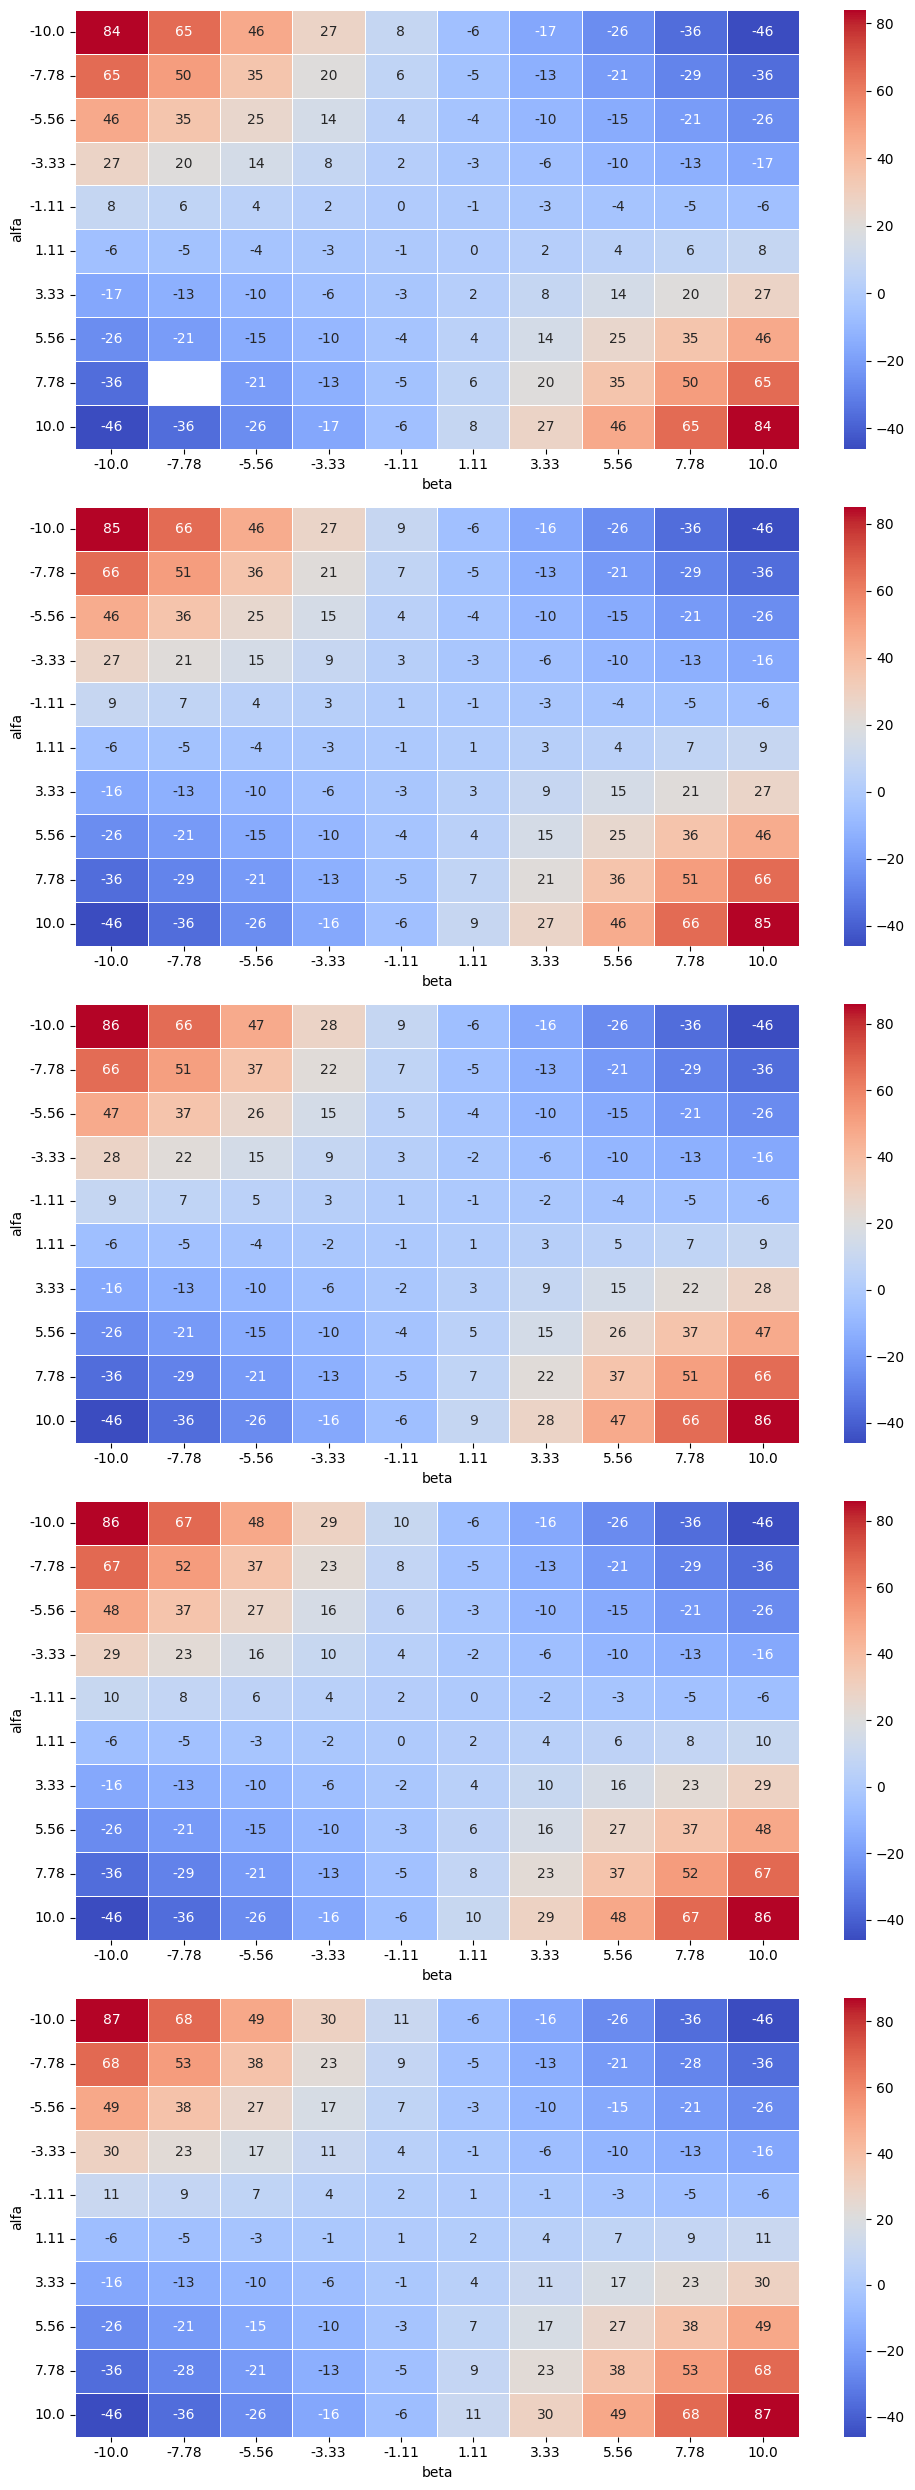

In [81]:
# Define the number of subplots based on the number of unique gamma values
num_subplots = len(unique_gamma)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='r')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('r.png')

# Display the plot
plt.show()

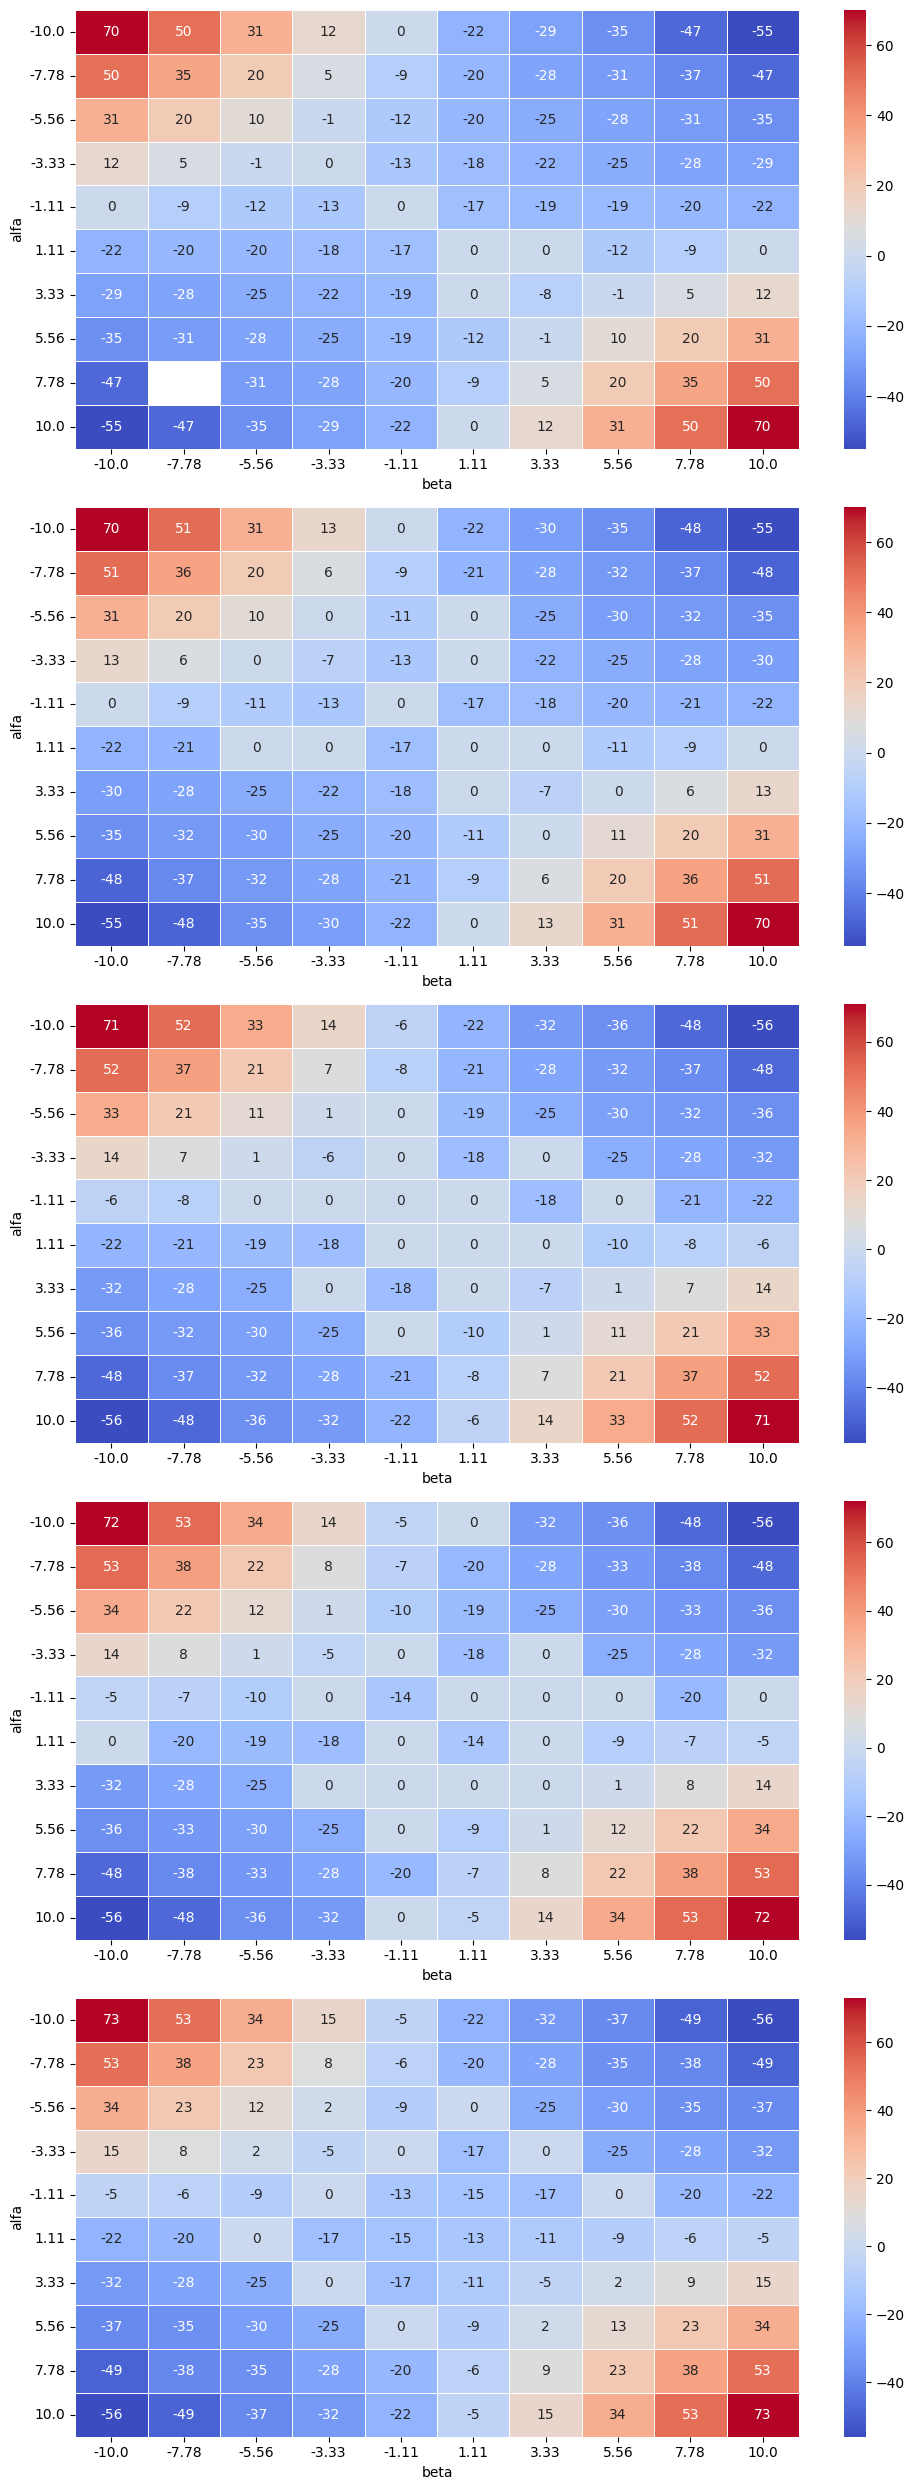

In [82]:
# Define the number of subplots based on the number of unique gamma values
num_subplots = len(unique_gamma)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='diff')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('diff.png')

# Display the plot
plt.show()

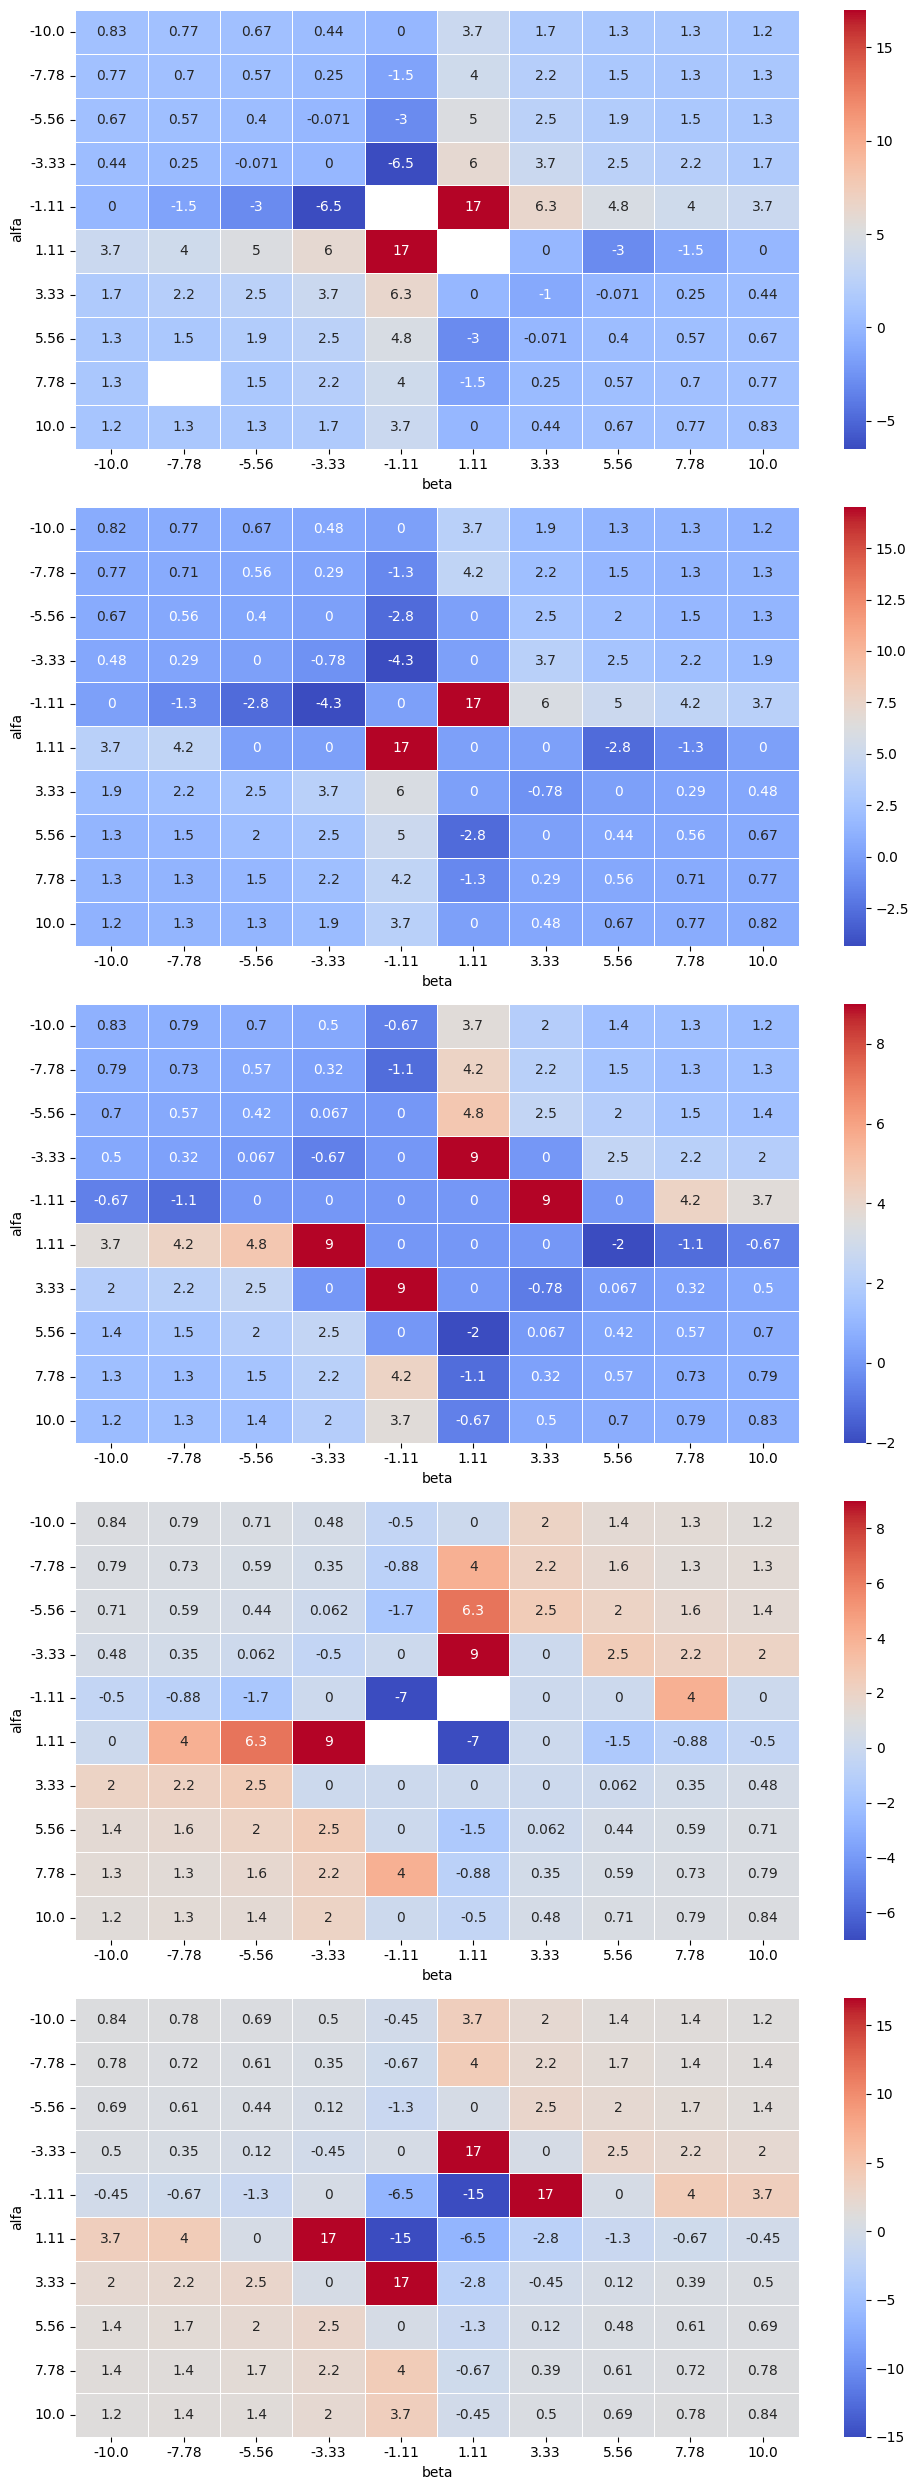

In [83]:
# Define the number of subplots based on the number of unique gamma values
num_subplots = len(unique_gamma)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='magnitude')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('magnitude.png')

# Display the plot
plt.show()

In [84]:
duplicates = data.duplicated()
print(data[duplicates])

     alfa  beta  gamma     r  stan  diff           err  magnitude
435  7.78  5.56    0.1  35.0  35.0  20.0  2.351262e+29   0.571429


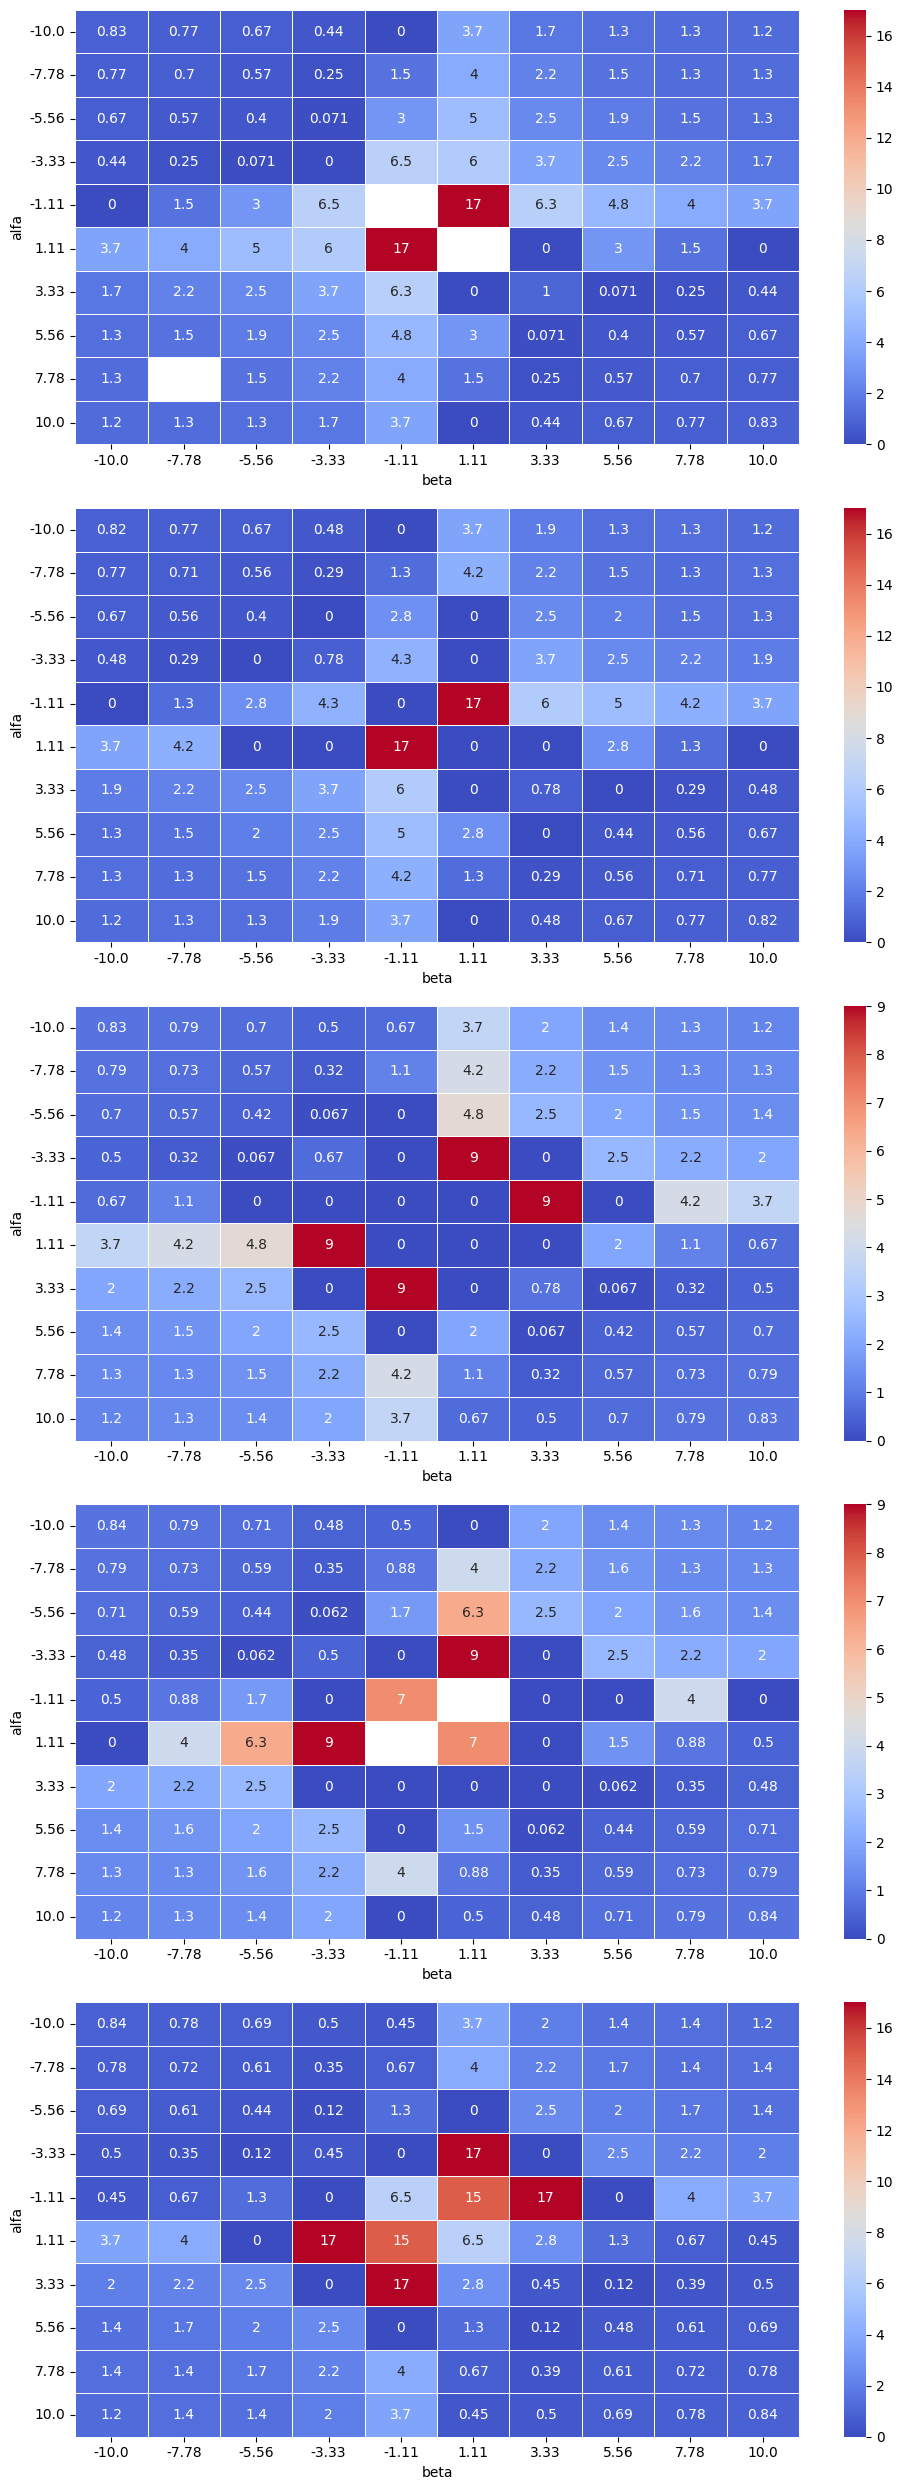

In [85]:
data['mod'] = data['magnitude'].apply(lambda x: x if x >= 0 else -x)

# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='mod')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i])
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('magnitude_mod.png')

# Display the plot
plt.show()

In [86]:
# Convert numbers to scientific notation
data['err'] = data['err'].apply(lambda x: '{:.2e}'.format(x))
data['err'] = data['err'].apply(lambda x: float(x.split('e')[1]))
print(data['err'])

data['err_n'] = data['err'] / data['r']

0      79.0
1      80.0
2      81.0
3      82.0
4      82.0
       ... 
495    79.0
496    80.0
497    81.0
498    82.0
499    82.0
Name: err, Length: 500, dtype: float64


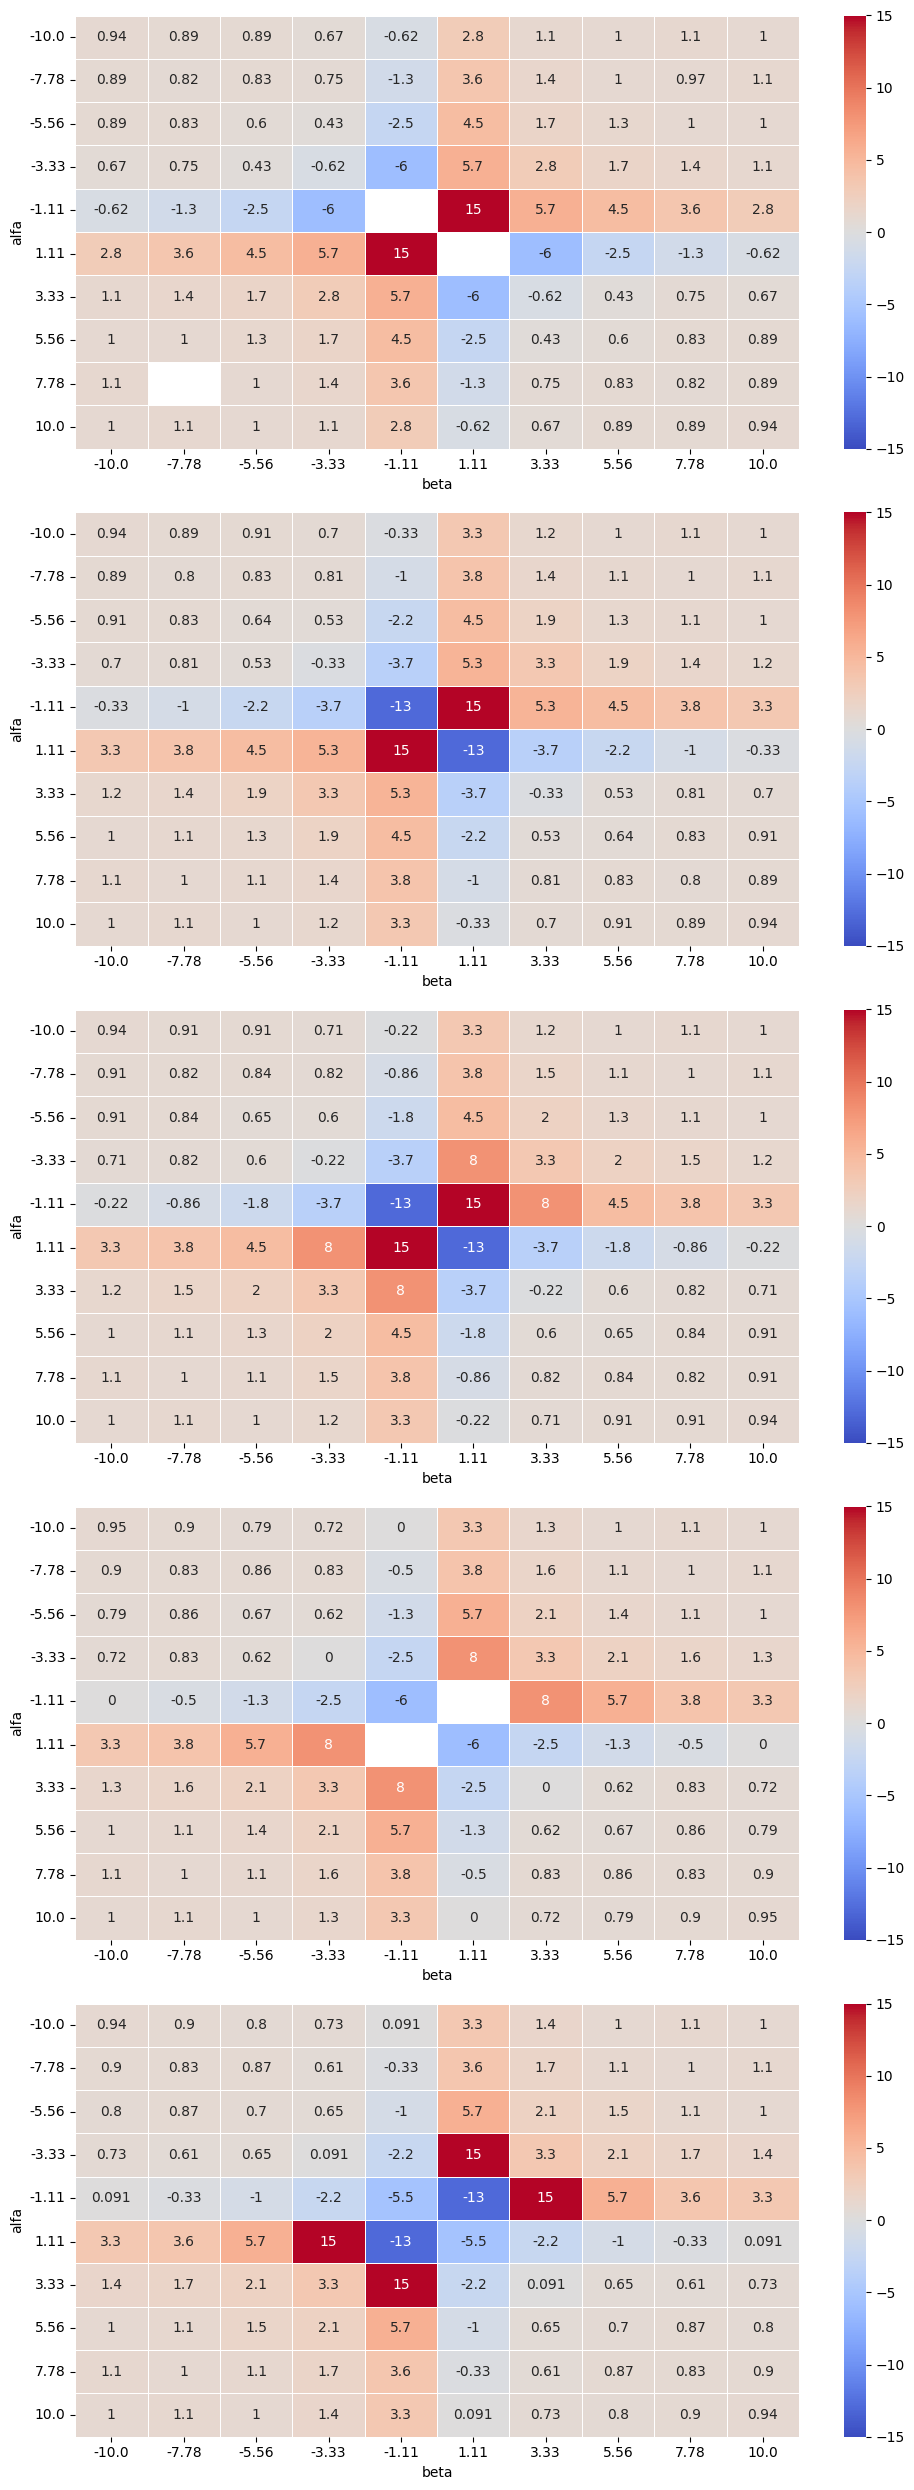

In [88]:
# Define the size of the figure
fig, axes = plt.subplots(nrows=num_subplots, figsize=(10, 5*num_subplots))

# Iterate over the values of gamma
for i, gamma in enumerate(unique_gamma):
    # Filter the data for the current gamma value
    filtered_data = data[data['gamma'] == gamma]

    # Create a pivot table with alfa as rows and beta as columns
    pivot_table = filtered_data.pivot_table(index='alfa', columns='beta', values='err_n')

    # Create the heatmap for the current gamma value using the pivot table
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[i], vmin=-15, vmax=15)
    
# Adjust the spacing between subplots
plt.tight_layout()

# Save the last graphic
fig.savefig('err_n.png')

# Display the plot
plt.show()